In [ ]:
!pip install tf

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from keras.models import Model,Sequential


In [ ]:
import os
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_train = zipfile.ZipFile('/content/drive/MyDrive/FER_dataset.zip', 'r') #Opens the zip file in read mode
zip_train.extractall('/tmp')
zip_train.close()

In [ ]:
labels=['angry','disgust','fear','happy','neutral','sad','surprise']

In [ ]:

train_dir = '/tmp/train'
val_dir = '/tmp/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    train_dir,target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')

test_set = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


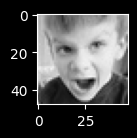

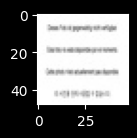

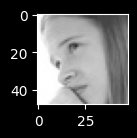

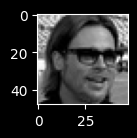

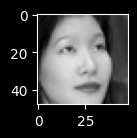

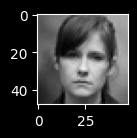

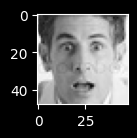

In [ ]:

for expression in labels:

  img_size=48
  plt.figure(figsize= (4,4))
  for i in range(1, 2, 1):
      plt.subplot(3,3,i)
      img = load_img(train_dir+"/"+expression+"/"+
                    os.listdir( train_dir+"/" + expression)[i], target_size=(img_size, img_size))
      plt.imshow(img)
  plt.show()





In [ ]:
from keras.optimizers import Adam,SGD,RMSprop

In [ ]:
categories=7
model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(categories, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
tensorboard = TensorBoard(log_dir = 'logs')
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [tensorboard,checkpoint,reduce_learningrate]

epochs = 15



In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.7456 - accuracy: 0.3257
Epoch 1: val_accuracy improved from -inf to 0.30720, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


448/448 [==============================] - 1609s 4s/step - loss: 1.7456 - accuracy: 0.3257 - val_loss: 1.8065 - val_accuracy: 0.3072 - lr: 0.0010
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3736 - accuracy: 0.4725
Epoch 2: val_accuracy improved from 0.30720 to 0.50767, saving model to model.h5
448/448 [==============================] - 1670s 4s/step - loss: 1.3736 - accuracy: 0.4725 - val_loss: 1.2751 - val_accuracy: 0.5077 - lr: 0.0010
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.2445 - accuracy: 0.5256
Epoch 3: val_accuracy did not improve from 0.50767
448/448 [==============================] - 1670s 4s/step - loss: 1.2445 - accuracy: 0.5256 - val_loss: 1.2968 - val_accuracy: 0.4894 - lr: 0.0010
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.1603 - accuracy: 0.5582
Epoch 4: val_accuracy improved from 0.50767 to 0.54367, saving model to model.h5
448/448 [==============================] - 1652s 4s/step - lo

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save_weights('model2.h5')